# Análisis del clima de Barcelona 


### Descarga de programas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### Para evitar alertas:

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Descargando el archivo:

In [3]:
data = pd.read_csv('datasets/barcelona-weather/Barcelona-Weather.csv',parse_dates=['DATE'],low_memory= False)

In [4]:
data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,SPE00119891,"BARCELONA, SP",41.4192,2.1253,412.0,1920-01-01,3.5,",,E",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SPE00119891,"BARCELONA, SP",41.4192,2.1253,412.0,1920-01-02,0.0,",,E",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SPE00119891,"BARCELONA, SP",41.4192,2.1253,412.0,1920-01-03,0.0,",,E",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SPE00119891,"BARCELONA, SP",41.4192,2.1253,412.0,1920-01-04,16.3,",,E",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SPE00119891,"BARCELONA, SP",41.4192,2.1253,412.0,1920-01-05,7.9,",,E",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Observando la clase de datos por columna:
data.dtypes

STATION                    object
NAME                       object
LATITUDE                  float64
LONGITUDE                 float64
ELEVATION                 float64
DATE               datetime64[ns]
PRCP                      float64
PRCP_ATTRIBUTES            object
SNWD                      float64
SNWD_ATTRIBUTES            object
TAVG                      float64
TAVG_ATTRIBUTES            object
TMAX                      float64
TMAX_ATTRIBUTES            object
TMIN                      float64
TMIN_ATTRIBUTES            object
dtype: object

In [6]:
#Observando las dimensiones del dataframe:
print(data.shape)
#Quiero observar si existen valores nulos:
data.isnull().any()

(67809, 16)


STATION            False
NAME               False
LATITUDE           False
LONGITUDE          False
ELEVATION          False
DATE               False
PRCP                True
PRCP_ATTRIBUTES     True
SNWD                True
SNWD_ATTRIBUTES     True
TAVG                True
TAVG_ATTRIBUTES     True
TMAX                True
TMAX_ATTRIBUTES     True
TMIN                True
TMIN_ATTRIBUTES     True
dtype: bool

Existen al menos un valor nulo en las columnas: `PRCP`,`PRCP_ATTRIBUTES`,`SNWD`,`SNWD_ATTRIBUTES`,`TAVG`,`TAVG_ATTRIBUTES`,`TMAX`,`TMAX_ATTRIBUTES`,`TMIN`y<br>`TMIN_ATTRIBUTES` 

In [7]:
#Quiero averiguar la cantidad de datos no nulos por columna:
data.count()

STATION            67809
NAME               67809
LATITUDE           67809
LONGITUDE          67809
ELEVATION          67809
DATE               67809
PRCP               65970
PRCP_ATTRIBUTES    65970
SNWD                   2
SNWD_ATTRIBUTES        2
TAVG               16360
TAVG_ATTRIBUTES    16360
TMAX               61187
TMAX_ATTRIBUTES    61187
TMIN               60985
TMIN_ATTRIBUTES    60985
dtype: int64

In [8]:
#Conociendo el nombre de las columnas:
data.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'PRCP',
       'PRCP_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES',
       'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES'],
      dtype='object')

In [9]:
#Lista de las columnas a utilizar:
features = ['NAME', 'DATE', 'PRCP', 'TMAX', 'TMIN']

In [10]:
df = data[features]

In [11]:
df.dtypes

NAME            object
DATE    datetime64[ns]
PRCP           float64
TMAX           float64
TMIN           float64
dtype: object

In [12]:
df.head(10)

,NAME,DATE,PRCP,TMAX,TMIN
0,"BARCELONA, SP",1920-01-01,3.5,NaN,NaN
1,"BARCELONA, SP",1920-01-02,0.0,NaN,NaN
2,"BARCELONA, SP",1920-01-03,0.0,NaN,NaN
3,"BARCELONA, SP",1920-01-04,16.3,NaN,NaN
4,"BARCELONA, SP",1920-01-05,7.9,NaN,NaN
5,"BARCELONA, SP",1920-01-06,4.9,NaN,NaN
6,"BARCELONA, SP",1920-01-07,0.0,NaN,NaN
7,"BARCELONA, SP",1920-01-08,0.0,NaN,NaN
8,"BARCELONA, SP",1920-01-09,0.0,NaN,NaN
9,"BARCELONA, SP",1920-01-10,0.0,NaN,NaN


In [13]:
#Eliminando los valores nulos por filas:
df= df.dropna(axis=0)

In [14]:
print(df.shape)
df.head(10)


(59127, 5)


,NAME,DATE,PRCP,TMAX,TMIN
2192,"BARCELONA, SP",1926-01-01,0.0,13.1,9.8
2193,"BARCELONA, SP",1926-01-02,0.0,14.5,9.1
2194,"BARCELONA, SP",1926-01-03,0.0,10.2,6.9
2195,"BARCELONA, SP",1926-01-04,0.0,12.4,5.0
2196,"BARCELONA, SP",1926-01-05,0.0,10.0,5.2
2197,"BARCELONA, SP",1926-01-06,0.0,11.4,5.3
2198,"BARCELONA, SP",1926-01-07,0.0,11.5,6.5
2199,"BARCELONA, SP",1926-01-08,0.0,10.5,7.2
2200,"BARCELONA, SP",1926-01-09,0.0,11.4,6.3
2201,"BARCELONA, SP",1926-01-10,0.0,9.6,6.4


In [15]:
df.NAME.value_counts(normalize=True)


BARCELONA, SP               0.530519
BARCELONA AEROPUERTO, SP    0.469481
Name: NAME, dtype: float64

## Graficando la precipitación historica:


In [16]:
#Insertando las columnas de mes y año:
df['mes']=df.DATE.dt.month
df['año']=df.DATE.dt.year

In [17]:
#Chequeando los datos nuevos:
df.dtypes

NAME            object
DATE    datetime64[ns]
PRCP           float64
TMAX           float64
TMIN           float64
mes              int64
año              int64
dtype: object

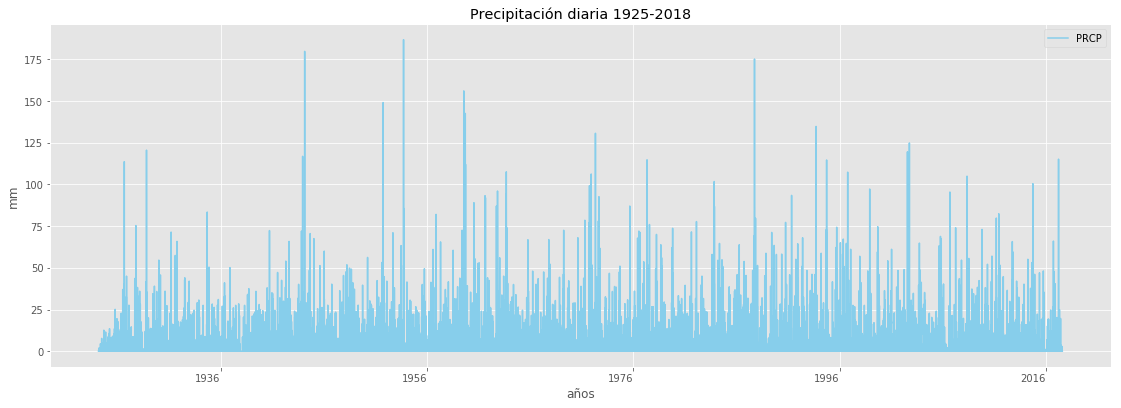

In [18]:
plt.style.use('ggplot')
df.plot(x='DATE',y='PRCP', color='skyblue',figsize=(19,7),grid=True,rot=0)
plt.xlabel('años')
plt.ylabel('mm')
plt.title('Precipitación diaria 1925-2018')
plt.show()

### Precipitación máxima diaria por mes

In [19]:
#Agrupando por año y mes y eligiendo la precipitación máxima
df_PRCP=df.groupby(['año','mes'],as_index=False).PRCP.max()
#Creando el atributo de fecha como el primer día de cada mes
df_PRCP['fecha']= list(map(lambda x,y: '01-'+ str(x)+ '-'+ str(y),df_PRCP.mes,df_PRCP.año))
df_PRCP['fecha']= pd.to_datetime(df_PRCP.fecha,format='%d-%m-%Y')

In [20]:
df_PRCP.head()

,año,mes,PRCP,fecha
0,1924,3,2.0,1924-03-01
1,1924,5,4.5,1924-05-01
2,1924,6,7.7,1924-06-01
3,1924,7,4.7,1924-07-01
4,1924,8,5.2,1924-08-01


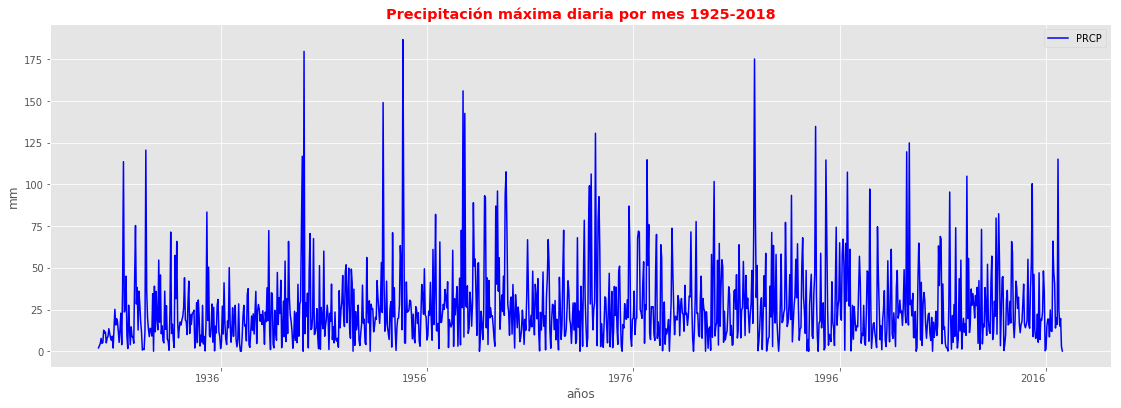

In [21]:
df_PRCP.plot(x='fecha',y='PRCP',figsize=(19,7),color='blue',grid=True,rot=0)
plt.title('Precipitación máxima diaria por mes 1925-2018',color= 'red',fontweight= 'bold')
plt.xlabel('años')
plt.ylabel('mm')
plt.show()

### Precipitación máxima diaria por año

In [22]:
#Agrupando por año y eligiendo la precipitación máxima
df_PRCP=df.groupby(['año'],as_index=False).PRCP.max()

In [23]:
df_PRCP.head()

,año,PRCP
0,1924,12.6
1,1925,25.1
2,1926,113.6
3,1927,75.3
4,1928,120.5


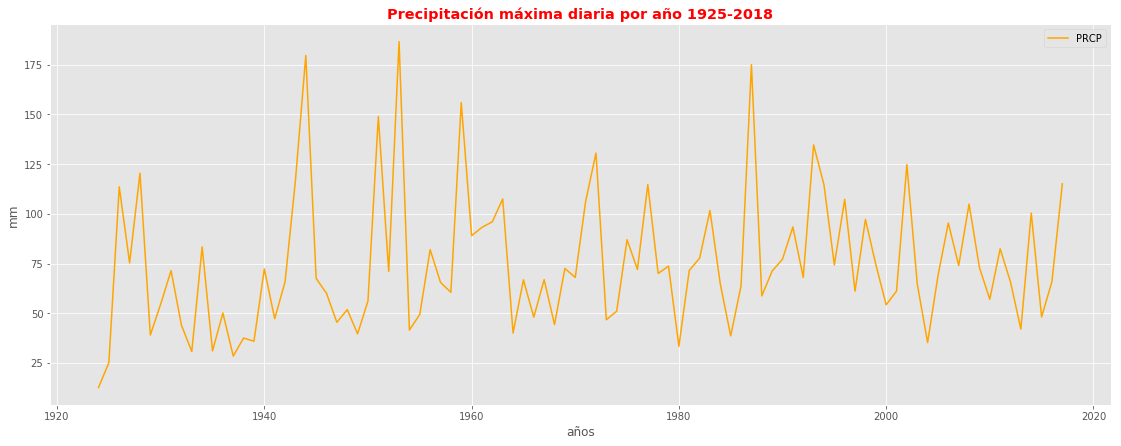

In [24]:
df_PRCP.plot(x='año',y='PRCP',figsize=(19,7),color='orange',grid=True,rot=0)
plt.title('Precipitación máxima diaria por año 1925-2018',color= 'red',fontweight= 'bold')
plt.xlabel('años')
plt.ylabel('mm')
plt.show()

### Graficando las temperatura máxima y mínima histórica en barcelona:

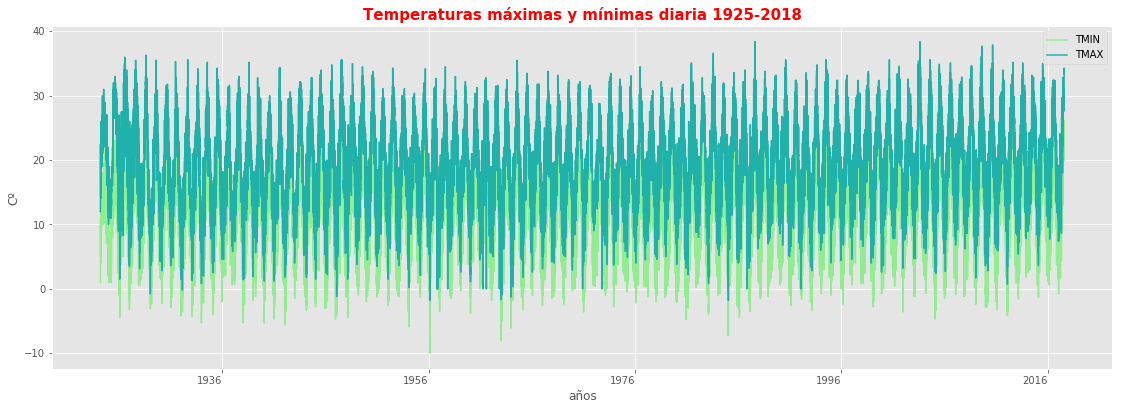

In [25]:
df.plot(x='DATE',y=['TMIN','TMAX'],color=['lightgreen','lightseagreen'],figsize=(19,7),grid=True,rot=0)
plt.title('Temperaturas máximas y mínimas diaria 1925-2018',color= 'red',fontweight= 'bold',fontsize=15)
plt.xlabel('años')
plt.ylabel('Cº')
plt.show()